In [1]:
def f(y):
    y.append(1)
    y = [2, 3]
    print("y =", y)

x = []
f(x)
print("x =", x)

y = [2, 3]
x = [1]


In [2]:
def primfact_iter(n):
    factors = []
    i = 2
    while i < n**(1/2):
        while n%i == 0:
            factors.append(i)
            n /= i
        i += 1
    if n != 1:
        factors.append(n)
    return factors

In [3]:
def primfact_recur_body(n, factors, i):
    if i < n**(1/2):
        while n%i == 0:
            factors.append(i)
            n /= i
        i += 1
        return primfact_recur_body(n, factors, i)
    else:
        return n, factors, i

def primfact_recur(n):
    factors = []
    i = 2
    n, factors, i = primfact_recur_body(n, factors, i)
    if n != 1:
        factors.append(n)
    return factors

In [4]:
k = 20211012
print(primfact_iter(k))
print(primfact_recur(k))

[2, 2, 3, 3, 3, 187139.0]
[2, 2, 3, 3, 3, 187139.0]


In [5]:
def geometric_series_recur(q, k):
    if k>0:
        return q**k + geometric_series_recur(q, k-1)
    else:
        return 1

In [6]:
def geometric_series_iter(q, k):
    j = 0
    retv = 1
    while k > j:
        j += 1
        retv += q**j
    return retv

In [7]:
print(geometric_series_recur(0.75, 10))
print(geometric_series_iter(0.75, 10))

3.831059455871582
3.831059455871582


In [8]:
def fibonacci_iter(n):
    fibo = [0, 1]
    for k in range(2, n+1):
        fibo.append(fibo[k-1] + fibo[k-2])
    return fibo[n]

In [9]:
def fibonacci_recur(k):
    if k >= 2:
        return fibonacci_recur(k-1) + fibonacci_recur(k-2)
    elif k >= 1:
        return 1
    else:
        return 0

In [10]:
import time
k = 40

start = time.time()
print("Fibonacci nr.", k, "=", fibonacci_iter(k))
end = time.time()
print("Time required for iterative execution:", end - start, "s")

start = time.time()
print("Fibonacci nr.", k, "=", fibonacci_recur(k))
end = time.time()
print("Time required for naive recursive execution:", end - start, "s")

Fibonacci nr. 40 = 102334155
Time required for iterative execution: 0.00018286705017089844 s
Fibonacci nr. 40 = 102334155
Time required for naive recursive execution: 30.82245421409607 s


In [11]:
def fibonacci_recur_recall(k, F):
    if k in F.keys():
        return F[k]
    elif k >= 2:
        Fk = fibonacci_recur_recall(k-1, F) + fibonacci_recur_recall(k-2, F)
    elif k >= 1:
        Fk = 1
    else:
        Fk = 0
    F[k] = Fk
    return Fk

In [31]:
import time
step = 15
kmax = 2400
repetitions = 800

perf_iter = {}
perf_recur = {}

for k in range(0, kmax+1, step):
    start = time.time()
    for i in range(repetitions):
        k_iter = fibonacci_iter(k)
    end = time.time()
    perf_iter[k] = (end - start)/repetitions

    start = time.time()
    for i in range(repetitions):
        k_recur = fibonacci_recur_recall(k, {}) 
    end = time.time()
    perf_recur[k] = (end - start)/repetitions
    
    print(k, perf_iter[k], perf_recur[k], k_iter, k_recur, sep='\t')

0	6.890296936035157e-07	3.629922866821289e-07	0	0
15	2.543032169342041e-06	8.649528026580811e-06	610	610
30	4.418492317199707e-06	1.2949705123901367e-05	832040	832040
45	6.906986236572265e-06	1.8463134765625e-05	1134903170	1134903170
60	8.573234081268311e-06	3.426909446716309e-05	1548008755920	1548008755920
75	1.128852367401123e-05	3.140300512313843e-05	2111485077978050	2111485077978050
90	1.2550055980682373e-05	3.614276647567749e-05	2880067194370816120	2880067194370816120
105	1.4327168464660645e-05	4.144787788391113e-05	3928413764606871165730	3928413764606871165730
120	1.6566812992095947e-05	5.39165735244751e-05	5358359254990966640871840	5358359254990966640871840
135	1.920074224472046e-05	5.622625350952149e-05	7308805952221443105020355490	7308805952221443105020355490
150	2.1445155143737794e-05	7.370889186859132e-05	9969216677189303386214405760200	9969216677189303386214405760200
165	2.3777782917022706e-05	6.676644086837768e-05	13598018856492162040239554477268290	13598018856492162040239

675	0.00010217517614364624	0.000282059907913208	521401368331405065117389673092721167865606665536905240054000465695003287479466298469643896877133715080215034906732232054782240651067620552450	521401368331405065117389673092721167865606665536905240054000465695003287479466298469643896877133715080215034906732232054782240651067620552450
690	0.00010538280010223389	0.00028866976499557494	711191848662898739848693775198753609852446309655832028330454660598682611672193522149774111717714260979387118204994178871696251636420290229056920	711191848662898739848693775198753609852446309655832028330454660598682611672193522149774111717714260979387118204994178871696251636420290229056920
705	0.00010889321565628051	0.00029886454343795775	970066202977562212558683426760773016559904631977220423547980211057068777324159443678590358026859129109599109446646966713225742014317926940054191330	9700662029775622125586834267607730165599046319772204235479802110570687773241594436785903580268591291095991094466469667132257420143

990	0.00016106903553009033	0.0004680532217025757	353410009178752575339944833520459068284945046358154977604109175253890696634271360121583566110064725510836075851584985143412396868586425109102723291106570618750075392710633321729992106743321640281356794177320	353410009178752575339944833520459068284945046358154977604109175253890696634271360121583566110064725510836075851584985143412396868586425109102723291106570618750075392710633321729992106743321640281356794177320
1005	0.00016624659299850465	0.0005050647258758545	482051511617926448416241857411039626258600330733909004920469712704382351844831823569922886993050824175326520025449797859766560885196970738202943545195859929088936259370887605815413541849563887924611727164704130	482051511617926448416241857411039626258600330733909004920469712704382351844831823569922886993050824175326520025449797859766560885196970738202943545195859929088936259370887605815413541849563887924611727164704130
1020	0.00017210185527801513	0.0005257555842399597	6575186152568

1230	0.0002030324935913086	0.0005630657076835632	50735565489499797512576144344242780042620227238147640546853218443231457841287797456600083212822748558767337492604319704628923840439204144749031679717828456000580783593116489752032700480117938528975177935704132468083995866400821866352373075439900593592513640	50735565489499797512576144344242780042620227238147640546853218443231457841287797456600083212822748558767337492604319704628923840439204144749031679717828456000580783593116489752032700480117938528975177935704132468083995866400821866352373075439900593592513640
1245	0.00020398199558258057	0.0005631023645401001	69203348523820113554472120640669111382434870027263174497438309844688868853700475497166944274485045979513484452306956616658996547764753956067738516552026868718113415488801184144748613072284534180776732379263665065071293243550517457543062493111795951828556954370	6920334852382011355447212064066911138243487002726317449743830984468886885370047549716694427448504597951348445230695661665899

1440	0.0002580887079238892	0.000794934332370758	3914866508431471361148793987953607300088428753972908501657382404690211361501063264625978882315580290519447457728293373764066788584024069398800428459770142350811894770729873194010281749733661407513804651252026669135283792063431807004225506814702922160621247026028619389629299722842113162285992338142080	3914866508431471361148793987953607300088428753972908501657382404690211361501063264625978882315580290519447457728293373764066788584024069398800428459770142350811894770729873194010281749733661407513804651252026669135283792063431807004225506814702922160621247026028619389629299722842113162285992338142080
1455	0.00026295632123947145	0.0007530775666236877	5339880787635720652087069725299639121022323118408766910211333472178673485657857790019793295401148947025922262158676847980788888912764102551340387126525120812900912045306370683900592648083952668532910425251414475512322386513407728034401278155940407603539041695879572196402211399588152850759898355922

1620	0.0002716612815856934	0.0007701349258422851	162364919967415384388612713255278947946193052715605350008180644491640071530786494634245774166353401226691823145806049198419239635346489002937381250885604522987431214878981091110775951825106508922057284559652507584821644419564375202883939754857719385079490281625663705166419049096723241439196862993739245312986969658116794119441932763769840	162364919967415384388612713255278947946193052715605350008180644491640071530786494634245774166353401226691823145806049198419239635346489002937381250885604522987431214878981091110775951825106508922057284559652507584821644419564375202883939754857719385079490281625663705166419049096723241439196862993739245312986969658116794119441932763769840
1635	0.00029933273792266847	0.0008820423483848572	22146586987135568240972763299540887526337101051065468195692430281379910372962446016709048684954843208887665199943637076330097904979190557606357126188654552494761512749741445960312412832792522110448372676109740755796669916

1785	0.000324750542640686	0.000887923240661621	4936883103657708012645104504577060603928715510966458581481511253172658646822291286089239666847791151908057751489163373324883524560737800885249906528195370454731344137157632395624152684255619615686646455480465568047471941144069077531627357451177976097603749394625615002735971939340827982706428677962944121274516311923360637869769232154000653078445747844457412043738307477410	4936883103657708012645104504577060603928715510966458581481511253172658646822291286089239666847791151908057751489163373324883524560737800885249906528195370454731344137157632395624152684255619615686646455480465568047471941144069077531627357451177976097603749394625615002735971939340827982706428677962944121274516311923360637869769232154000653078445747844457412043738307477410
1800	0.0003170514106750488	0.0009002834558486938	673391217280293347260635300184694507465828737888432608947760163274608027595260420319958026515359386239085811776643229549856098971953028182945285028645453627

1935	0.00036471188068389895	0.0009800875186920166	110052238718943731182522616512970500147783473175722040372273687808501892940188451315260715816603956618431361201367657786798423843114173395926993315094255178995805100460164979682723595337795211159563555621318872742942818647996270052591431132501928182384194119460164552114383101055081100330502580347257703977533255052439639766978815918521360943394148493109288333436055113478728861235451400335166212536878690	110052238718943731182522616512970500147783473175722040372273687808501892940188451315260715816603956618431361201367657786798423843114173395926993315094255178995805100460164979682723595337795211159563555621318872742942818647996270052591431132501928182384194119460164552114383101055081100330502580347257703977533255052439639766978815918521360943394148493109288333436055113478728861235451400335166212536878690
1950	0.00037196606397628786	0.0009915873408317566	1501113342960553541063713422558812565561589080966972890389102084975868246568125946114853

2085	0.0003808817267417908	0.001026213765144348	2453267576475132917499820710108099583915923701280824757341545366560294864495389585970982528824050182786478082106326827008407009968381956566413605885131901572118753658246315284178425791946935198250887810279797167005334429046544822207645104522794450420174994767213183960860450207153392735690897150719513698338587086297453367117213133491877114876689232090274707957331961157522552131874513446775796521751639089416095513704700694821812390210	2453267576475132917499820710108099583915923701280824757341545366560294864495389585970982528824050182786478082106326827008407009968381956566413605885131901572118753658246315284178425791946935198250887810279797167005334429046544822207645104522794450420174994767213183960860450207153392735690897150719513698338587086297453367117213133491877114876689232090274707957331961157522552131874513446775796521751639089416095513704700694821812390210
2100	0.00037493139505386354	0.0010232391953468322	3346258772894381788558434639

2220	0.0003964588046073914	0.0011264771223068238	40093719971299513428254307964025813278691026998956988390127500645798096397921288543018308071346136488318907294003029681178901445803007071082556952959151583518368984688857558701923138459932501931369906507737533071796152591136185834266093454564065390094578096033436629921643182226342130451235452972488779871369017011409583144243262788251637324817343113514188839437168322324087383304218152222004373866565000523266273524751967934587472021616779226794319285179148929040	40093719971299513428254307964025813278691026998956988390127500645798096397921288543018308071346136488318907294003029681178901445803007071082556952959151583518368984688857558701923138459932501931369906507737533071796152591136185834266093454564065390094578096033436629921643182226342130451235452972488779871369017011409583144243262788251637324817343113514188839437168322324087383304218152222004373866565000523266273524751967934587472021616779226794319285179148929040
2235	0.00041176557540

2355	0.0004533502459526062	0.0012259817123413087	655251142008184299698915769135235535303282874535333691977597861805316393064041557015827904142729003530953793400171532478455022458946636470205874633225893658139930971446149677840225336769588898857396492722780960517730224675067774313695174231094274247338034510335123380018104613394325036359415340126565962712501625850976495114990048821428104789708796164111644584803015138811014513681922327789388899741713558609459477980335436723353814512823859317461593891493401516290259971969579005832082800770	65525114200818429969891576913523553530328287453533369197759786180531639306404155701582790414272900353095379340017153247845502245894663647020587463322589365813993097144614967784022533676958889885739649272278096051773022467506777431369517423109427424733803451033512338001810461339432503635941534012656596271250162585097649511499004882142810478970879616411164458480301513881101451368192232778938889974171355860945947798033543672335381451282385931746159389149340

<AxesSubplot:xlabel='order no. in the Fibonacci sequence', ylabel='average runtime in seconds'>

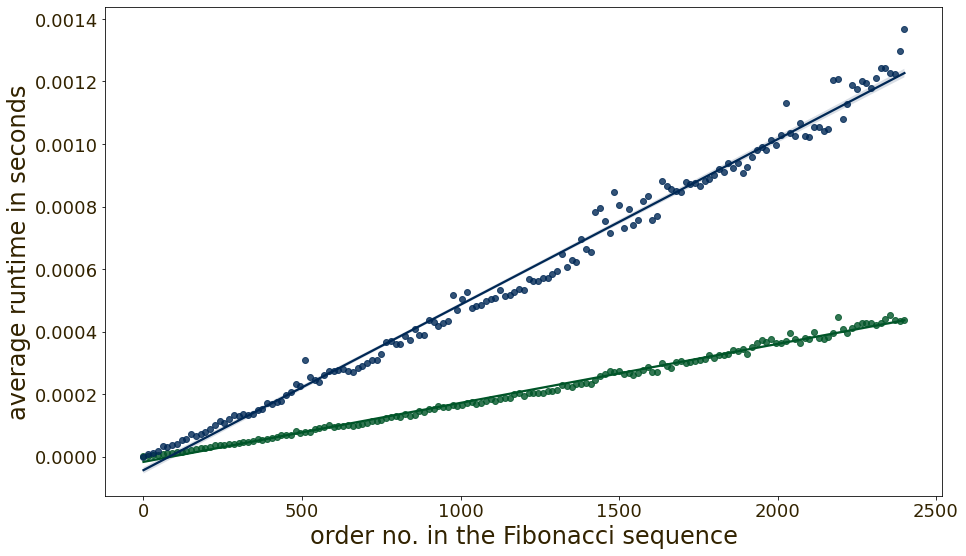

In [32]:
import seaborn as sbn
import matplotlib.pyplot as plt

keylist_iter = list(perf_iter.keys())
vallist_iter = list(perf_iter.values())

keylist_recur = list(perf_recur.keys())
vallist_recur = list(perf_recur.values())

fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("order no. in the Fibonacci sequence", fontsize=24, color="#322300")
ax.set_ylabel("average runtime in seconds", fontsize=24, color="#322300")

sbn.regplot(x=keylist_iter, y=vallist_iter, color='#005528', order=1)
sbn.regplot(x=keylist_recur, y=vallist_recur, color='#002855', order=1)